This is a continuation of the file in which we explored the problem of detecting malicious URls using various classification techniques such as Naive Bayes, Logistic Regression, and Support Vector Machines using both Binary and Multiclass Classification for each.

## **Neural Network for Classification**

In [1]:
# Load the Dataset
import pandas as pd

In [2]:
df = pd.read_csv("malicious_phish.csv")

In [3]:
df

,url,type
0,br-icloud.com.br,phishing
1,mp3raid.com/music/krizz_kaliko.html,benign
2,bopsecrets.org/rexroth/cr/1.htm,benign
3,http://www.garage-pirenne.be/index.php?option=...,defacement
4,http://adventure-nicaragua.net/index.php?optio...,defacement
...,...,...
651186,xbox360.ign.com/objects/850/850402.html,phishing
651187,games.teamxbox.com/xbox-360/1860/Dead-Space/,phishing
651188,www.gamespot.com/xbox360/action/deadspace/,phishing
651189,en.wikipedia.org/wiki/Dead_Space_(video_game),phishing


In [4]:
df.type.unique() # 1 of four class labels 

array(['phishing', 'benign', 'defacement', 'malware'], dtype=object)

In [5]:
# Now we split our dataset into training and testing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np


In [6]:
# Transform the data into numpy arrays to make it easier to apply the functions
URLs = np.array(df.url.values)
labels = np.array(df.type.values)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(URLs, labels, test_size=0.2, random_state=32)

In [8]:
# Now we import everything we need for our keras NN model
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import np_utils
from keras.models import Sequential
from keras import layers
from keras.wrappers.scikit_learn import KerasClassifier

In [9]:
tokenizer = Tokenizer() # we use the keras built in text tokenizer
tokenizer.fit_on_texts(X_train) #add the URLs in our training set to the vocabulary

# Then we get the final training and testing URLs by converting each to a sequence of integers (tokenized)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

vocab_size = len(tokenizer.word_index) + 1 # all the words that our tokenizer now recognizes have been added to vocab

In [10]:
print(X_train[0]) # This is the transformation of the first URL

[62, 1, 129, 2987, 10745, 123384]


In [11]:
len_train = [len(i) for i in X_train]
len_test = [len(i) for i in X_test]
max_train = max(len_train)
max_test = max(len_test)
max_url = max(max_train, max_test)


print(max_url) # length of the largest tokenized url

368


In [12]:
# So we take all of our urls and add padding (0's) to the end of those that are less than max_url in length
X_train = pad_sequences(X_train, padding='post', maxlen=max_url)
X_test = pad_sequences(X_test, padding='post', maxlen=max_url)

type(X_train)
type(X_test)

numpy.ndarray

In [13]:
encoder = LabelEncoder()
encoder.fit(labels) # adds all the possible labels, so we can do multi-class classification

encoded_y_train = encoder.transform(y_train)
encoded_y_test = encoder.transform(y_test)

dummy_train_labels = np_utils.to_categorical(encoded_y_train)
dummy_test_labels = np_utils.to_categorical(encoded_y_test)
type(dummy_test_labels)

numpy.ndarray

In [14]:
type(dummy_train_labels)

numpy.ndarray

In [15]:
type(X_train)

numpy.ndarray

In [16]:
encoded_y_test

array([2, 0, 0, ..., 3, 0, 0])

In [17]:
print(encoded_y_test[1:30])

[0 0 0 0 0 0 3 0 0 0 0 1 0 0 0 1 3 1 1 0 2 3 0 1 0 1 0 0 0]


In [18]:
print(y_test[1:30])

['benign' 'benign' 'benign' 'benign' 'benign' 'benign' 'phishing' 'benign'
 'benign' 'benign' 'benign' 'defacement' 'benign' 'benign' 'benign'
 'defacement' 'phishing' 'defacement' 'defacement' 'benign' 'malware'
 'phishing' 'benign' 'defacement' 'benign' 'defacement' 'benign' 'benign'
 'benign']


This helps us know the encoding. 
benign -> 0
defacement -> 1
malware -> 2
phishing -> 3

In [19]:
# Now we can start building the neural network itself
import tensorflow as tf

In [20]:
# Instantiate and start adding to NN model
model = Sequential() # A sequential model

In [21]:
model.add(layers.Flatten())

model.add(layers.Dropout(0.2))

#model.add(layers.GlobalAveragePooling1D())

model.add(layers.Dropout(0.2))

model.add(layers.Dense(512, activation='sigmoid')) # 50 neurons with ReLU activation function

model.add(layers.Dropout(0.2))

model.add(layers.Dense(256, activation='relu')) # 50 neurons with ReLU activation function

model.add(layers.Dropout(0.2))

model.add(layers.Dense(4, activation='softmax')) #softmax function for our final output layer

In [22]:
# Now we compile the model, with the metrics that we will need
model.compile(optimizer='adam',
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])



In [23]:
# Since we know we have a major class imbalance, we can set some class weights to help with this
# We know that there is the following data split:
# Benign (0): 0.66%, Defacement (1): 0.15%, Phishing (3): 0.14%, Malware (2): 0.05%

from sklearn.utils import class_weight

class_weights = {0: 1.,
                 1: 2.,
                 2: 10.,
                 3: 2.}

In [24]:
print(X_train)

[[    62      1    129 ...      0      0      0]
 [   943      1    470 ...      0      0      0]
 [     2      3   5306 ...      0      0      0]
 ...
 [465807   7606      1 ...      0      0      0]
 [     2      3 107922 ...      0      0      0]
 [   645      1   8364 ...      0      0      0]]


In [25]:
X_train = np.asarray(X_train).astype(np.float32)

In [26]:
print(X_train)

[[6.20000e+01 1.00000e+00 1.29000e+02 ... 0.00000e+00 0.00000e+00
  0.00000e+00]
 [9.43000e+02 1.00000e+00 4.70000e+02 ... 0.00000e+00 0.00000e+00
  0.00000e+00]
 [2.00000e+00 3.00000e+00 5.30600e+03 ... 0.00000e+00 0.00000e+00
  0.00000e+00]
 ...
 [4.65807e+05 7.60600e+03 1.00000e+00 ... 0.00000e+00 0.00000e+00
  0.00000e+00]
 [2.00000e+00 3.00000e+00 1.07922e+05 ... 0.00000e+00 0.00000e+00
  0.00000e+00]
 [6.45000e+02 1.00000e+00 8.36400e+03 ... 0.00000e+00 0.00000e+00
  0.00000e+00]]


In [27]:
# Now we can train the model
history = model.fit(X_train, dummy_train_labels,
                    epochs=1,
                    verbose=True,
                    batch_size=128,
                    validation_split=0.1,
                    shuffle=True,
                    class_weight=class_weights
)

4070/4070 [==============================] - 50s 12ms/step - loss: 1.8429 - accuracy: 0.5766


In [28]:
model.summary() # get the summary of the layers in the model

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 368)               0         
_________________________________________________________________
dropout (Dropout)            (None, 368)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 368)               0         
_________________________________________________________________
dense (Dense)                (None, 512)               188928    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0

In [29]:
pred = np.argmax(model.predict(X_test), axis=-1)

In [30]:
pred

array([2, 0, 2, ..., 0, 0, 0])

In [31]:
encoded_y_test

array([2, 0, 0, ..., 3, 0, 0])

In [32]:
from sklearn.metrics import precision_recall_fscore_support, accuracy_score

accuracy = accuracy_score(encoded_y_test, pred)
print("Accuracy:", accuracy)
precision, recall, f1_score, _ = precision_recall_fscore_support(encoded_y_test, pred)
print("Precision: {}, Recall: {}, F1-score: {}".format(precision, recall, f1_score))

Accuracy: 0.6212885541197337
Precision: [0.84371427 0.59051883 0.18424473 0.36074981], Recall: [0.72220345 0.49950718 0.85880708 0.20176518], F1-score: [0.77824441 0.5412135  0.30339946 0.25879044]


In [33]:
metrics_matrix = confusion_matrix(encoded_y_test, y_pred=pred) 

In [34]:
metrics_matrix

array([[61986,  4500, 14728,  4615],
       [ 1997,  9629,  5798,  1853],
       [  500,   193,  5529,   216],
       [ 8985,  1984,  3954,  3772]])

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

We can visualize the results in a confusion matrix to understand how the neural network classifier behaves for each of the classes.

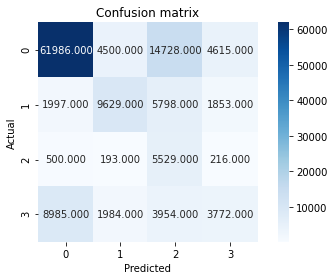

In [36]:
sns.heatmap(metrics_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()
plt.show()

We can see that it performs fairly well for the benign class, but has trouble with the other classes. However, given the massive class imbalance, this was to be expected, and in fact performs better than we had hoped.

In [37]:
# Tool to take in a url and predict it's label

In [54]:
sample_url = input("Please Enter your URL to evaluate: ")

Please Enter your URL to evaluate: www.attacker.info.cw


In [55]:
vectorize_URL = tokenizer.texts_to_sequences(np.array([sample_url]))

In [56]:
vectorize_URL = pad_sequences(vectorize_URL, padding='post', maxlen=max_url)

In [57]:
prediction = model.predict(vectorize_URL)

In [58]:
print(prediction)

[[0.2046008  0.24298315 0.16655637 0.38585964]]


In [59]:
res = encoder.classes_[np.argmax(prediction)]

In [60]:
res

'phishing'